In [149]:
# Importing required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [150]:
# Load the data
df = pd.read_csv('../Dataset/classificationData.csv')
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
df = df.drop(df.columns[0], axis=1) # Drop first column

del df['Crime Occurences']
df.head(3)

The dataset has 20160 rows and 7 columns.


,district,day,month,hour,Class
0,SOUTHERN,Wednesday,1,18,Extreme
1,SOUTHERN,Wednesday,3,18,Extreme
2,SOUTHERN,Friday,8,18,Extreme


In [151]:
from sklearn.preprocessing import LabelEncoder
y = df.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
y = y.astype('float')

In [152]:
print(y)

[0. 0. 0. ... 2. 2. 2.]


In [153]:
%%capture
df = pd.get_dummies(df, columns=['district', 'day'], drop_first=True)
print(df.head())

X = df.loc[:, df.columns != 'Class'].values;
X = X.astype('float')

In [154]:
print(X)

[[ 1. 18.  0. ...  0.  0.  1.]
 [ 3. 18.  0. ...  0.  0.  1.]
 [ 8. 18.  0. ...  0.  0.  0.]
 ...
 [12.  4.  0. ...  0.  1.  0.]
 [ 9.  4.  0. ...  1.  0.  0.]
 [12.  5.  0. ...  0.  0.  1.]]


In [155]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [156]:
# Importing classification packages.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

SEED = 1 # Random Seed

# Classification
lr = LogisticRegression(random_state=SEED)
knn = KNN()
xg = XGBClassifier()
dt = DecisionTreeClassifier(random_state=SEED)
rf = RandomForestClassifier(random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt),
               ('Forest', rf),
               ('XGB', xg)]

In [157]:
# Iterating over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    # Fitting
    clf.fit(X_train, y_train)
    # Predicting
    y_pred = clf.predict(X_test)
    
    print('{:s} : {:s}'.format(clf_name, classification_report(y_test, y_pred)))

Logistic Regression :               precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       517
         1.0       0.54      0.62      0.58       478
         2.0       0.65      0.77      0.70       512
         3.0       0.72      0.47      0.57       509

    accuracy                           0.64      2016
   macro avg       0.65      0.64      0.64      2016
weighted avg       0.65      0.64      0.64      2016

K Nearest Neighbours :               precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       517
         1.0       0.62      0.64      0.63       478
         2.0       0.83      0.88      0.86       512
         3.0       0.71      0.60      0.65       509

    accuracy                           0.74      2016
   macro avg       0.74      0.74      0.74      2016
weighted avg       0.74      0.74      0.74      2016

Classification Tree :               precision    recall  f1-score   support

        

In [158]:
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:s}'.format(classification_report(y_test, y_pred)))

Voting Classifier:               precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       517
         1.0       0.67      0.74      0.70       478
         2.0       0.83      0.89      0.86       512
         3.0       0.75      0.64      0.69       509

    accuracy                           0.78      2016
   macro avg       0.78      0.78      0.78      2016
weighted avg       0.78      0.78      0.78      2016



In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(10,100,10),
    'criterion': ('gini', 'entropy'),
    'max_depth': (3,5,7,9,10),
    'min_samples_split': (2,4,6)
}

RFm = GridSearchCV(RandomForestClassifier(n_jobs = -1, random_state = SEED), param_grid = params, cv = 3, verbose = 3)

RF_grid_model = RFm.fit(X_train, y_train)

Fitting 3 folds for each of 570 candidates, totalling 1710 fits
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10, score=0.638, total=   2.1s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10, score=0.644, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10, score=0.633, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=20, score=0.644, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=20, score=0.656, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=20, score=0.653, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30, score=0.653, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30, score=0.662, total=   0.3s
[CV] criterion=gini, max_depth=3, min_sa

[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=170, score=0.668, total=   0.8s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=180 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=180, score=0.659, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=180 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=180, score=0.670, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=180 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=180, score=0.668, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=190 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=190, score=0.660, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=190 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=190, score=0.670, total=   0.6s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=3, min_samples_split=4, n_estimators=140, score=0.668, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=4, n_estimators=150 
[CV]  criterion=gini, max_depth=3, min_samples_split=4, n_estimators=150, score=0.660, total=   0.7s
[CV] criterion=gini, max_depth=3, min_samples_split=4, n_estimators=150 
[CV]  criterion=gini, max_depth=3, min_samples_split=4, n_estimators=150, score=0.670, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=4, n_estimators=150 
[CV]  criterion=gini, max_depth=3, min_samples_split=4, n_estimators=150, score=0.668, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=4, n_estimators=160 
[CV]  criterion=gini, max_depth=3, min_samples_split=4, n_estimators=160, score=0.660, total=   0.6s
[CV] criterion=gini, max_depth=3, min_samples_split=4, n_estimators=160 
[CV]  criterion=gini, max_depth=3, min_samples_split=4, n_estimators=160, score=0.671, total=   0.6s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=3, min_samples_split=6, n_estimators=110, score=0.668, total=   0.5s
[CV] criterion=gini, max_depth=3, min_samples_split=6, n_estimators=120 
[CV]  criterion=gini, max_depth=3, min_samples_split=6, n_estimators=120, score=0.658, total=   0.5s
[CV] criterion=gini, max_depth=3, min_samples_split=6, n_estimators=120 
[CV]  criterion=gini, max_depth=3, min_samples_split=6, n_estimators=120, score=0.670, total=   0.5s
[CV] criterion=gini, max_depth=3, min_samples_split=6, n_estimators=120 
[CV]  criterion=gini, max_depth=3, min_samples_split=6, n_estimators=120, score=0.668, total=   0.5s
[CV] criterion=gini, max_depth=3, min_samples_split=6, n_estimators=130 
[CV]  criterion=gini, max_depth=3, min_samples_split=6, n_estimators=130, score=0.660, total=   0.5s
[CV] criterion=gini, max_depth=3, min_samples_split=6, n_estimators=130 
[CV]  criterion=gini, max_depth=3, min_samples_split=6, n_estimators=130, score=0.670, total=   0.5s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=80, score=0.684, total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=90, score=0.670, total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=90, score=0.682, total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=90, score=0.684, total=   0.5s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100, score=0.670, total=   0.5s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100, score=0.681, total=   0.5s
[CV] criterion=gini, max_depth=5, mi

[CV]  criterion=gini, max_depth=5, min_samples_split=4, n_estimators=50, score=0.683, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=4, n_estimators=60 
[CV]  criterion=gini, max_depth=5, min_samples_split=4, n_estimators=60, score=0.671, total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_split=4, n_estimators=60 
[CV]  criterion=gini, max_depth=5, min_samples_split=4, n_estimators=60, score=0.683, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=4, n_estimators=60 
[CV]  criterion=gini, max_depth=5, min_samples_split=4, n_estimators=60, score=0.684, total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_split=4, n_estimators=70, score=0.671, total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_split=4, n_estimators=70, score=0.682, total=   0.4s
[CV] criterion=gini, max_depth=5, min_sa

[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=20, score=0.683, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=30 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=30, score=0.667, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=30 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=30, score=0.684, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=30 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=30, score=0.683, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=40 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=40, score=0.670, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=40 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=40, score=0.684, total=   0.3s
[CV] criterion=gini, max_depth=5, min_sa

[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=180, score=0.683, total=   0.7s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=190 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=190, score=0.671, total=   0.7s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=190 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=190, score=0.685, total=   0.7s
[CV] criterion=gini, max_depth=5, min_samples_split=6, n_estimators=190 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, n_estimators=190, score=0.682, total=   0.7s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=10, score=0.721, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=10, score=0.726, total=   0.2s
[CV] criterion=gini, max_depth=7,

[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=150, score=0.721, total=   0.7s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=160 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=160, score=0.699, total=   0.7s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=160 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=160, score=0.720, total=   0.7s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=160 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=160, score=0.720, total=   0.7s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=170 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=170, score=0.699, total=   0.8s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=170 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=170, score=0.721, total=   0.8s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=7, min_samples_split=4, n_estimators=120, score=0.718, total=   0.5s
[CV] criterion=gini, max_depth=7, min_samples_split=4, n_estimators=130 
[CV]  criterion=gini, max_depth=7, min_samples_split=4, n_estimators=130, score=0.698, total=   0.6s
[CV] criterion=gini, max_depth=7, min_samples_split=4, n_estimators=130 
[CV]  criterion=gini, max_depth=7, min_samples_split=4, n_estimators=130, score=0.717, total=   0.5s
[CV] criterion=gini, max_depth=7, min_samples_split=4, n_estimators=130 
[CV]  criterion=gini, max_depth=7, min_samples_split=4, n_estimators=130, score=0.719, total=   0.6s
[CV] criterion=gini, max_depth=7, min_samples_split=4, n_estimators=140 
[CV]  criterion=gini, max_depth=7, min_samples_split=4, n_estimators=140, score=0.697, total=   0.7s
[CV] criterion=gini, max_depth=7, min_samples_split=4, n_estimators=140 
[CV]  criterion=gini, max_depth=7, min_samples_split=4, n_estimators=140, score=0.716, total=   0.6s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=7, min_samples_split=6, n_estimators=90, score=0.719, total=   0.4s
[CV] criterion=gini, max_depth=7, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_split=6, n_estimators=100, score=0.696, total=   0.5s
[CV] criterion=gini, max_depth=7, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_split=6, n_estimators=100, score=0.711, total=   0.5s
[CV] criterion=gini, max_depth=7, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_split=6, n_estimators=100, score=0.719, total=   0.5s
[CV] criterion=gini, max_depth=7, min_samples_split=6, n_estimators=110 
[CV]  criterion=gini, max_depth=7, min_samples_split=6, n_estimators=110, score=0.695, total=   0.5s
[CV] criterion=gini, max_depth=7, min_samples_split=6, n_estimators=110 
[CV]  criterion=gini, max_depth=7, min_samples_split=6, n_estimators=110, score=0.714, total=   0.5s
[CV] criterion=gini, max_depth

[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=60, score=0.755, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=70, score=0.738, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=70, score=0.752, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=70, score=0.752, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=80, score=0.739, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=2, n_estimators=80 
[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=80, score=0.754, total=   0.4s
[CV] criterion=gini, max_depth=9, min_sa

[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=30, score=0.753, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=40 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=40, score=0.738, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=40 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=40, score=0.759, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=40 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=40, score=0.757, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=50, score=0.740, total=   0.4s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=50, score=0.756, total=   0.4s
[CV] criterion=gini, max_depth=9, min_sa

[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=190, score=0.750, total=   0.8s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=10, score=0.747, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=10, score=0.754, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=10, score=0.742, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=20, score=0.745, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=20, score=0.755, total=   0.3s
[CV] criterion=gini, max_depth=9, min_s

[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=160, score=0.750, total=   0.8s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=170 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=170, score=0.740, total=   0.8s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=170 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=170, score=0.750, total=   0.8s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=170 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=170, score=0.750, total=   0.9s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=180 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=180, score=0.743, total=   0.7s
[CV] criterion=gini, max_depth=9, min_samples_split=6, n_estimators=180 
[CV]  criterion=gini, max_depth=9, min_samples_split=6, n_estimators=180, score=0.750, total=   0.7s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=130, score=0.764, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=130 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=130, score=0.767, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=140 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=140, score=0.752, total=   0.7s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=140 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=140, score=0.762, total=   0.7s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=140 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=140, score=0.766, total=   0.7s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=150, score=0.754, total=   0.8s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=100, score=0.754, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=100, score=0.765, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=100, score=0.766, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=110 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=110, score=0.753, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=110 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=110, score=0.765, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=110 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=110, score=0.766, total=   0.5s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=10, min_samples_split=6, n_estimators=60, score=0.773, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_split=6, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_split=6, n_estimators=70, score=0.754, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=6, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_split=6, n_estimators=70, score=0.762, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=6, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_split=6, n_estimators=70, score=0.770, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=6, n_estimators=80 
[CV]  criterion=gini, max_depth=10, min_samples_split=6, n_estimators=80, score=0.754, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=6, n_estimators=80 
[CV]  criterion=gini, max_depth=10, min_samples_split=6, n_estimators=80, score=0.762, total=   0.5s
[CV] criterion=gini, max_dept

[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=30, score=0.638, total=   0.3s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=30, score=0.623, total=   0.3s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=40 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=40, score=0.657, total=   0.3s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=40 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=40, score=0.666, total=   0.3s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=40 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=40, score=0.627, total=   0.3s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=50, score=0.658, total=   0.3s
[CV] cr

[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=180, score=0.667, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=190 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=190, score=0.658, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=190 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=190, score=0.669, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=190 
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=190, score=0.668, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=10, score=0.639, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=10, score=0.648, total=   0.2s


[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=150, score=0.660, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=150 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=150, score=0.670, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=150 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=150, score=0.668, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=160 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=160, score=0.660, total=   0.9s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=160 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=160, score=0.670, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=160 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=160, score=0.668, total=   0

[CV]  criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=110, score=0.669, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=110 
[CV]  criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=110, score=0.668, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=120 
[CV]  criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=120, score=0.657, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=120 
[CV]  criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=120, score=0.670, total=   0.4s
[CV] criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=120 
[CV]  criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=120, score=0.667, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, min_samples_split=6, n_estimators=130, score=0.659, total=   0

[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=70, score=0.679, total=   0.4s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80, score=0.674, total=   0.4s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80, score=0.679, total=   0.4s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=80, score=0.679, total=   0.4s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=90 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=90, score=0.673, total=   0.4s
[CV] criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=90 
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=90, score=0.681, total=   0.5s
[CV] cr

[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=40, score=0.674, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=40 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=40, score=0.687, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=40 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=40, score=0.682, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50, score=0.675, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50, score=0.688, total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50, score=0.680, total=   0.3s
[CV] cr

[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=190, score=0.685, total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=190 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=190, score=0.681, total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=10, score=0.675, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=10, score=0.695, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=10, score=0.691, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=20, score=0.673, total=   0.2s
[CV]

[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=150, score=0.680, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=160 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=160, score=0.673, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=160 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=160, score=0.687, total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=160 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=160, score=0.682, total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=170 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=170, score=0.672, total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=170 
[CV]  criterion=entropy, max_depth=5, min_samples_split=6, n_estimators=170, score=0.686, total=   0

[CV]  criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=120, score=0.700, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=120 
[CV]  criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=120, score=0.723, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=120 
[CV]  criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=120, score=0.718, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=130 
[CV]  criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=130, score=0.700, total=   0.6s
[CV] criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=130 
[CV]  criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=130, score=0.722, total=   0.6s
[CV] criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=130 
[CV]  criterion=entropy, max_depth=7, min_samples_split=2, n_estimators=130, score=0.718, total=   0

[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=80, score=0.717, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=80 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=80, score=0.719, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90, score=0.701, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90, score=0.717, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90, score=0.716, total=   0.5s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=100, score=0.702, total=   0.5s
[CV] 

[CV]  criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=40, score=0.720, total=   0.3s
[CV] criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=50, score=0.708, total=   0.3s
[CV] criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=50, score=0.729, total=   0.3s
[CV] criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=50, score=0.723, total=   0.3s
[CV] criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=60 
[CV]  criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=60, score=0.706, total=   0.4s
[CV] criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=60 
[CV]  criterion=entropy, max_depth=7, min_samples_split=6, n_estimators=60, score=0.724, total=   0.4s
[CV] cr

[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=10, score=0.745, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=10, score=0.751, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=10, score=0.755, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=20, score=0.741, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=20, score=0.750, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=20, score=0.756, total=   0.2s
[CV] cr

[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=160, score=0.753, total=   0.7s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=160 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=160, score=0.751, total=   0.7s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=170 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=170, score=0.737, total=   0.8s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=170 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=170, score=0.753, total=   0.8s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=170 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=170, score=0.750, total=   0.8s
[CV] criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=180 
[CV]  criterion=entropy, max_depth=9, min_samples_split=2, n_estimators=180, score=0.737, total=   0

[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=120, score=0.762, total=   0.6s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=130 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=130, score=0.739, total=   0.6s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=130 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=130, score=0.755, total=   0.6s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=130 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=130, score=0.761, total=   0.6s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=140 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=140, score=0.738, total=   0.6s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=140 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=140, score=0.754, total=   0

[CV]  criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=90, score=0.743, total=   0.4s
[CV] criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=90 
[CV]  criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=90, score=0.753, total=   0.5s
[CV] criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=90 
[CV]  criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=90, score=0.751, total=   0.4s
[CV] criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=100, score=0.743, total=   0.5s
[CV] criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=100, score=0.753, total=   0.5s
[CV] criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_split=6, n_estimators=100, score=0.753, total=   0.5s
[

[CV]  criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=50, score=0.764, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=50, score=0.771, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=60 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=60, score=0.755, total=   0.4s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=60 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=60, score=0.766, total=   0.4s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=60 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=60, score=0.768, total=   0.4s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=70, score=0.754, total=   0

[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=10, score=0.765, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=20, score=0.752, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=20, score=0.763, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=20, score=0.758, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=30 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=30, score=0.752, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=30 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=30, score=0.762, total=   0

[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=170, score=0.751, total=   0.9s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=170 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=170, score=0.764, total=   1.1s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=170 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=170, score=0.769, total=   1.4s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=180 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=180, score=0.750, total=   0.7s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=180 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=180, score=0.765, total=   0.7s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=180 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=180, score=0.769,

[CV]  criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=130, score=0.764, total=   0.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=130 
[CV]  criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=130, score=0.771, total=   0.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=140 
[CV]  criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=140, score=0.751, total=   0.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=140 
[CV]  criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=140, score=0.763, total=   0.6s
[CV] criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=140 
[CV]  criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=140, score=0.771, total=   0.7s
[CV] criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=150 
[CV]  criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=150, score=0.750,

[Parallel(n_jobs=1)]: Done 1710 out of 1710 | elapsed: 14.2min finished


In [14]:
RF_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [15]:
RF_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [16]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [17]:
y_pred = RF_model.predict(X_test)

print('Random Forest: {:s}'.format(classification_report(y_test, y_pred)))

Random Forest:               precision    recall  f1-score   support

           0       0.86      0.79      0.83       517
           1       0.61      0.72      0.66       478
           2       0.85      0.90      0.87       512
           3       0.73      0.62      0.67       509

    accuracy                           0.76      2016
   macro avg       0.76      0.76      0.76      2016
weighted avg       0.76      0.76      0.76      2016



In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[430  87   0   0]
 [ 64 356   6  52]
 [  0   0 458  54]
 [  5  92  87 325]]


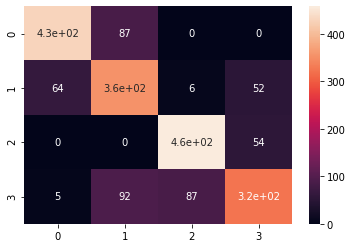

In [130]:
import seaborn as sns
sns_plot = sns.heatmap(cm, annot=True)
figure = sns_plot.get_figure()
figure.savefig("../Outputs/confusion_matrix.png", dpi = 1000)

In [159]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [160]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [161]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [162]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
18144/18144 [==============================] - 1s 37us/sample - loss: -26.1900 - acc: 0.2504
Epoch 2/100
18144/18144 [==============================] - 1s 31us/sample - loss: -318.8091 - acc: 0.2505
Epoch 3/100
18144/18144 [==============================] - 1s 31us/sample - loss: -1232.0949 - acc: 0.2505
Epoch 4/100
18144/18144 [==============================] - 1s 31us/sample - loss: -2971.7744 - acc: 0.2505
Epoch 5/100
18144/18144 [==============================] - 1s 31us/sample - loss: -5645.5684 - acc: 0.2505
Epoch 6/100
18144/18144 [==============================] - 1s 31us/sample - loss: -9309.6342 - acc: 0.2505
Epoch 7/100
18144/18144 [==============================] - 1s 38us/sample - loss: -14080.4913 - acc: 0.2505
Epoch 8/100
18144/18144 [==============================] - 1s 34us/sample - loss: -20005.6324 - acc: 0.2505
Epoch 9/100
18144/18144 [==============================] - 1s 32us/sample - loss: -27107.6147 - acc: 0.2505
Epoch 10/100
18144/18144 [===========

18144/18144 [==============================] - 1s 34us/sample - loss: -6505600.6237 - acc: 0.2505
Epoch 76/100
18144/18144 [==============================] - 1s 37us/sample - loss: -6743009.0993 - acc: 0.2505
Epoch 77/100
18144/18144 [==============================] - 1s 32us/sample - loss: -6987607.3298 - acc: 0.2505
Epoch 78/100
18144/18144 [==============================] - 1s 35us/sample - loss: -7238928.9692 - acc: 0.2505
Epoch 79/100
18144/18144 [==============================] - 1s 31us/sample - loss: -7495825.8308 - acc: 0.2505
Epoch 80/100
18144/18144 [==============================] - 1s 33us/sample - loss: -7758904.1409 - acc: 0.2505
Epoch 81/100
18144/18144 [==============================] - 1s 31us/sample - loss: -8028146.5719 - acc: 0.2505
Epoch 82/100
18144/18144 [==============================] - 1s 33us/sample - loss: -8304147.1574 - acc: 0.2505
Epoch 83/100
18144/18144 [==============================] - 1s 29us/sample - loss: -8585154.0359 - acc: 0.2505s - loss: -8645